In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.saving import register_keras_serializable
from tensorflow.keras.applications import VGG19

### Testing

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [3]:
x_train = x_train/255.0
x_val = x_val/255.0

In [22]:
encoder_input = tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.Flatten()(encoder_input)
encoder_output = tf.keras.layers.Dense(256, activation='relu')(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = tf.keras.layers.Dense(128, activation='relu')(encoder_output)
x = tf.keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Reshape((28,28,1))(x)

autoencoder = tf.keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,992 (1.28 MB)

 Trainable params: 334,992 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0137
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0110
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0098
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0092


In [24]:
test = autoencoder.predict(x_val[0].reshape(-1,28,28,1))[0]
test.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


(28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[1.1895545  1.0543425  0.37757194 1.0539631  0.8627418  0.8620721
  0.6858041  0.42335752 0.9484832  1.8738371  1.3039634  0.9728574
  0.57437897 0.6788248  0.62139046 0.23952508]
 [0.62847203 0.73789144 1.485988   0.9847955  1.682204   1.2071139
  1.0732362  0.76858    0.8328409  1.9183947  0.7395315  1.0932549
  0.2526654  0.43445897 0.66812736 0.8001471 ]
 [1.3007375  1.1897982  0.6567374  0.6260133  0.67630434 0.43824753
  1.0536023  0.5620128  1.6403995  1.5772513  0.98589784 1.0816039
  0.92581964 1.2669325  0.64806    1.1183285 ]
 [0.79394466 0.73137957 0.5503149  1.9749103  0.46771613 1.526174
  0.         0.3214605  2.1637409  1.4301504  0.8989296  0.38788125
  1.2992724  1.2070817  0.71106887 1.1616987 ]
 [1.9316238  0.85898054 0.51931554 0.3661218  0.81729764 0.66990536
  0.84554416 0.43269524 0.65930575 0.8465069  0.8456151  0.8863379
  0.73286456 0.37203297 0.35932052 0.32965052]
 [0.96879613 0.37529865 0.79998577 1.1869241  0.5910128

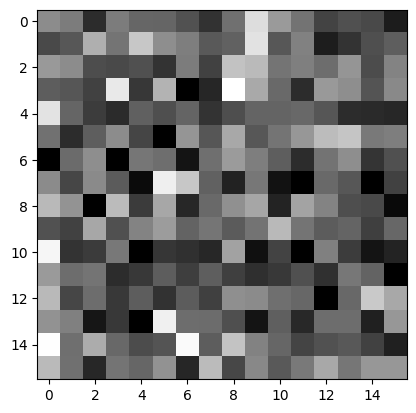

In [ ]:
encode = encoder.predict(x_val[0].reshape(-1,28,28,1))[0]

print(encode.reshape((16,16)))
plt.imshow(encode.reshape((16,16)), cmap='gray')

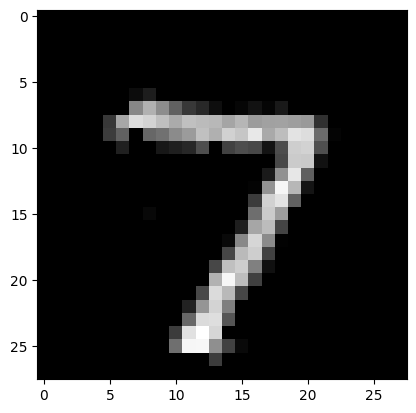

In [26]:
plt.imshow(test, cmap='gray');

In [3]:
BATCH_SIZE = 96
IMG_SIZE = (120, 120, 1)
DIRECTORY_PATH = r"C:\Users\LENOVO\Desktop\New folder (3)"

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DIRECTORY_PATH,
    validation_split=0.2,
    subset='training',
    seed=42,
    color_mode='grayscale',
    image_size=IMG_SIZE[0:2],
    batch_size=BATCH_SIZE,
    label_mode=None
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DIRECTORY_PATH,
    validation_split=0.2,
    subset='validation',
    seed=42,
    color_mode='grayscale',
    image_size=IMG_SIZE[0:2],
    batch_size=BATCH_SIZE,
    label_mode=None
)


Found 1060 files.
Using 848 files for training.
Found 1060 files.
Using 212 files for validation.


In [5]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [6]:
def load_image_from_path(image_path, image_size=(120, 120)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size, color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    return np.expand_dims(img, axis=0)

def show_model_comparisons(image_path, models, model_names, image_size=(120, 120)):
    input_img = load_image_from_path(image_path, image_size=image_size)

    plt.figure(figsize=(4 * (len(models) + 1), 4))
    plt.subplot(1, len(models) + 1, 1)
    plt.imshow(input_img[0].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    for i, (model, name) in enumerate(zip(models, model_names)):
        pred = model.predict(input_img)
        plt.subplot(1, len(models) + 1, i + 2)
        plt.imshow(pred[0].squeeze(), cmap='gray')
        plt.title(name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [7]:
FILL_MODE = 'nearest'
VALUE_RANGE = [0.0, 1.0]

augment1 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1,fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

augment2 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomBrightness((-0.5, 0.5), value_range=VALUE_RANGE),
    tf.keras.layers.RandomTranslation((-0.2, 0.3), (-0.3, 0.2), fill_mode=FILL_MODE),
    tf.keras.layers.RandomContrast(0.1),
])

augment3 = tf.keras.Sequential([
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomBrightness((-0.35, 0.35), value_range=VALUE_RANGE),
    tf.keras.layers.RandomRotation(0.3,fill_mode=FILL_MODE),
    tf.keras.layers.Resizing(120, 120)
])

augment4 = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

augment5 = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomBrightness((-0.2, 0.5), value_range=VALUE_RANGE),
])

def preprocess(pipeline = None):
    def augment(img):
        img = tf.cast(img, tf.float32) / 255.0
        if pipeline is not None:
           img =  pipeline(img)
        return img, img
    return augment

In [8]:
augment3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_height (RandomHeight)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness_1             │ ?                      │   0 (unbuilt) │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
aug1 = train_ds.map(preprocess(augment1), num_parallel_calls=tf.data.AUTOTUNE)
aug2 = train_ds.map(preprocess(augment2), num_parallel_calls=tf.data.AUTOTUNE)
aug3 = train_ds.map(preprocess(augment3), num_parallel_calls=tf.data.AUTOTUNE)
aug4 = train_ds.map(preprocess(augment4), num_parallel_calls=tf.data.AUTOTUNE)
aug5 = train_ds.map(preprocess(augment5), num_parallel_calls=tf.data.AUTOTUNE)
original = train_ds.map(preprocess(), num_parallel_calls=tf.data.AUTOTUNE)

trainData = tf.data.Dataset.sample_from_datasets(
    [aug1, aug2, aug3, aug4, aug5, original],
    weights=[0.5] * 6
)
valData = val_ds.map(preprocess())

In [10]:
valData

<_MapDataset element_spec=(TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None))>

In [11]:
input_img = tf.keras.layers.Input(shape=IMG_SIZE)

In [ ]:
x = tf.keras.layers.Conv2D(32, (11, 11), strides=1, activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, (7, 7), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = tf.keras.Model(input_img, encoded, name='encoder')

# ---------------- Decoder ----------------
x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 120, 120, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 120, 120, 32)   │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 30, 30, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 60, 60, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 120, 120, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 120, 120, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,097 (1.60 MB)

 Trainable params: 419,201 (1.60 MB)

 Non-trainable params: 896 (3.50 KB)

In [12]:
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(120, 120, 3))
vgg.trainable = False
feature_extractor = tf.keras.Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)

@tf.keras.utils.register_keras_serializable()
def perceptual_loss(y_true, y_pred):
    y_true_rgb = tf.image.grayscale_to_rgb(y_true)
    y_pred_rgb = tf.image.grayscale_to_rgb(y_pred)
    true_features = feature_extractor(y_true_rgb)
    pred_features = feature_extractor(y_pred_rgb)
    return tf.reduce_mean(tf.abs(true_features - pred_features))


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [21]:
def mean_similarity(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return mse*0.4 + (1 - ssim)*0.6


def mean_crossentropy(y_true, y_pred):
    bce = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred), axis=[1,2])
    mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=[1, 2, 3])
    return 0.45 * bce + 0.55 * mse

@register_keras_serializable()
def cross_similarity(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return bce*0.4 + (1 - ssim)*0.6

@tf.keras.utils.register_keras_serializable()
def perceptual_crossentropy(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    ssim = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    percept = perceptual_loss(y_true, y_pred)
    return 0.4 * bce + 0.3 * ssim + 0.3 * percept



Through a lot of trial and error, figured out that the combination of SSIM and binary_crossentropy seem to work the best as the loss function

In [14]:
autoencoder.compile(optimizer='adam', loss=cross_similarity)

with tf.device('GPU/:0'):
    autoencoder.fit(
        trainData.repeat(),
        epochs=20,
        steps_per_epoch=50
    )

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - loss: 0.5839
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - loss: 0.3311
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 0.2986
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.2853
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 0.2823
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - loss: 0.2914
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - loss: 0.2750
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - loss: 0.2894
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - loss: 0.2643
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 0.2614
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - loss: 0.2720
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - loss: 0.2690
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 0.2704
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - loss: 0.2601
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 0.2596
Epoch 16/20
50/50 ━

In [14]:
testImg = load_image_from_path(r"C:\Users\LENOVO\Desktop\New folder (3)\IMG_20250215_142033.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


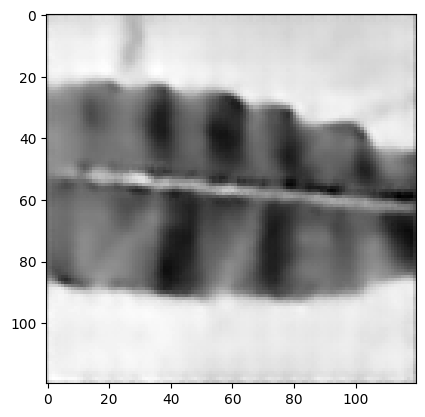

In [18]:
prediction = autoencoder.predict(testImg)
plt.imshow(prediction[0], cmap='gray');

In [ ]:
# --- Encoder ---
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

# --- Bottleneck ---
bn = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
bn = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn)

# --- Decoder ---
u3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(bn)
u3 = tf.keras.layers.Concatenate()([u3, c3])
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

u2 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c4)
u2 = tf.keras.layers.Concatenate()([u2, c2])
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

u1 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(c5)
u1 = tf.keras.layers.Concatenate()([u1, c1])
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u1)
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c6)


autoencoder2 = tf.keras.Model(input_img, outputs, name="autoencoder2")
autoencoder2.summary()

Model: "autoencoder2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 120, 120,  │        320 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 120, 120,  │      9,248 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 60, 60,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 60, 60,    │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 60, 60,    │     36,928 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 30, 30,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 30, 30,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 30, 30,    │    147,584 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 15, 15,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 15, 15,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 15, 15,    │    590,080 │ conv2d_10[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 30, 30,    │    295,040 │ conv2d_11[0][0]   │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 30, 30,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 30, 30,    │    295,040 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 30, 30,    │    147,584 │ conv2d_12[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 60, 60,    │     73,792 │ conv2d_13[0][0] 

 Total params: 2,140,065 (8.16 MB)

 Trainable params: 2,140,065 (8.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder2.compile(optimizer='adam', loss=cross_similarity, metrics=[tf.keras.metrics.MeanAbsoluteError()])

autoencoder2.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50
)

Epoch 1/17


50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - loss: 0.2052 - mean_absolute_error: 0.0643
Epoch 2/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - loss: 0.1774 - mean_absolute_error: 0.0060
Epoch 3/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - loss: 0.1765 - mean_absolute_error: 0.0046
Epoch 4/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - loss: 0.1730 - mean_absolute_error: 0.0064
Epoch 5/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - loss: 0.1667 - mean_absolute_error: 0.0061
Epoch 6/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - loss: 0.1729 - mean_absolute_error: 0.0064
Epoch 7/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - loss: 0.1797 - mean_absolute_error: 0.0054
Epoch 8/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - loss: 0.1769 - mean_absolute_error: 0.0128
Epoch 9/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - loss: 0.1773 - mean_absolute_error: 0.0074
Epoch 10/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - loss: 0.1717 - mean_absolute_error: 0.0127
Epoch 11/17
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/ste

In [53]:
autoencoder2 = tf.keras.models.load_model(r"C:\Users\LENOVO\Desktop\Python\Auto-Forest\models\UnetInspired.keras",
                                          custom_objects={'cross_similarity': cross_similarity})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


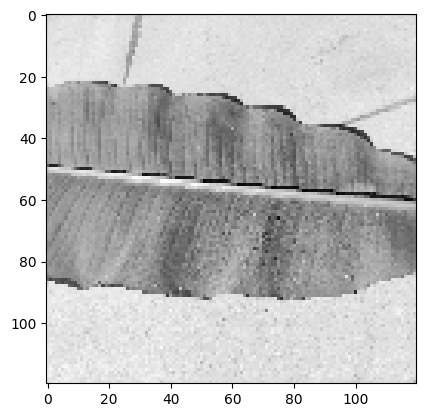

In [54]:
prediction2 = autoencoder2.predict(testImg)
plt.imshow(prediction2[0], cmap='gray');

In [26]:
autoencoder2.save('UnetInspired.keras')

In [17]:
def residual_block(x, filters):
    skip = x
    
    if skip.shape[-1] != filters:
        skip = tf.keras.layers.Conv2D(filters, 1, padding='same')(skip)
    
    x = tf.keras.layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(filters, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.add([x, skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [26]:
# --- Encoder ---
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)         
x = tf.keras.layers.BatchNormalization()(x)                                             
x = tf.keras.layers.MaxPooling2D(2)(x)                                                  
x = residual_block(x, 64)                                                      
x = tf.keras.layers.MaxPooling2D(2)(x)                                                  

x = residual_block(x, 128)                                                     
x = tf.keras.layers.MaxPooling2D(2)(x)                                                  

x = residual_block(x, 256)                                                     
x = tf.keras.layers.Dropout(0.3)(x)                                                     

# --- Latent space ---
x = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)                
x = tf.keras.layers.BatchNormalization()(x)                                             

# --- Decoder ---
x = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=2, padding='same', activation='relu')(x) 
x = residual_block(x, 256)                                                     

x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu')(x) 
x = tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=2, padding='same', activation='sigmoid')(x) 

# --- Model ---
residualEncoder = tf.keras.Model(input_img, x)
residualEncoder.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 120, 120,  │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 120, 120,  │        128 │ conv2d_63[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_23    │ (None, 60, 60,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 60, 60,    │     18,496 │ max_pooling2d_23… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        256 │ conv2d_65[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 60, 60,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        256 │ conv2d_66[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 60, 60,    │      2,112 │ max_pooling2d_23… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 60, 60,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_64[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 60, 60,    │          0 │ add_2[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 30, 30,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 30, 30,    │     73,856 │ max_pooling2d_24… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        512 │ conv2d_68[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 30, 30,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        512 │ conv2d_69[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_67 (Conv2D)  │ (None, 30, 30,    │      8,320 │ max_pooling2d_24

 Total params: 5,050,113 (19.26 MB)

 Trainable params: 5,046,209 (19.25 MB)

 Non-trainable params: 3,904 (15.25 KB)

In [ ]:
residualEncoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

residualEncoder.fit(
    trainData.repeat(),
    epochs=30,
    steps_per_epoch=50
)

In [ ]:
# --- Encoder ---
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(e1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(e1)

e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(p1)
e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(e2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(e2)

e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(p2)
e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(e3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(e3)

e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(p3)
e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(e4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(e4)

# --- Latent Space ---
l1 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(p4)
l2 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l1)
l3 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l2)
l4 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l3)

# --- Decoder ---
u4 = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2))(l4)
u4 = tf.keras.layers.Concatenate()([u4, e4])
c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u4)
c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

u3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(c3)
u3 = tf.keras.layers.Concatenate()([u3, e3])
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

u2 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c4)
u2 = tf.keras.layers.Concatenate()([u2, e2])
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

u1 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(c5)
u1 = tf.keras.layers.Concatenate()([u1, e1])
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u1)
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c6)
# --- Model ---
unet2 = tf.keras.Model(input_img, outputs)
unet2.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_273 (Conv2D) │ (None, 120, 120,  │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_274 (Conv2D) │ (None, 120, 120,  │      9,248 │ conv2d_273[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_89    │ (None, 60, 60,    │          0 │ conv2d_274[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_275 (Conv2D) │ (None, 60, 60,    │     18,496 │ max_pooling2d_89… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_276 (Conv2D) │ (None, 60, 60,    │     36,928 │ conv2d_275[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_90    │ (None, 30, 30,    │          0 │ conv2d_276[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_277 (Conv2D) │ (None, 30, 30,    │     73,856 │ max_pooling2d_90… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_278 (Conv2D) │ (None, 30, 30,    │    147,584 │ conv2d_277[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_91    │ (None, 15, 15,    │          0 │ conv2d_278[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_279 (Conv2D) │ (None, 15, 15,    │    295,168 │ max_pooling2d_91… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_280 (Conv2D) │ (None, 15, 15,    │    590,080 │ conv2d_279[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_92    │ (None, 7, 7, 256) │          0 │ conv2d_280[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_281 (Conv2D) │ (None, 7, 7, 512) │  1,180,160 │ max_pooling2d_92… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_282 (Conv2D) │ (None, 7, 7, 512) │  2,359,808 │ conv2d_281[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_283 (Conv2D) │ (None, 7, 7, 512) │  2,359,808 │ conv2d_282[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_284 (Conv2D) │ (None, 7, 7, 512) │  2,359,808 │ conv2d_283[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_49 │ (None, 15, 15,    │    589,952 │ conv2d_284[0][0]  │
│ (Conv2DTranspose)   │ 128)              │            │                 

 Total params: 11,432,225 (43.61 MB)

 Trainable params: 11,432,225 (43.61 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
unet2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

unet2.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - loss: 0.4702
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - loss: 0.3429
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - loss: 0.2893
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - loss: 0.2194
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - loss: 0.2133
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - loss: 0.2072
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - loss: 0.1969
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - loss: 0.2014
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - loss: 0.1904
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - loss: 0.1947
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - loss: 0.1924
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - loss: 0.1845
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - loss: 0.1892
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - loss: 0.1811
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - loss: 0.1872
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


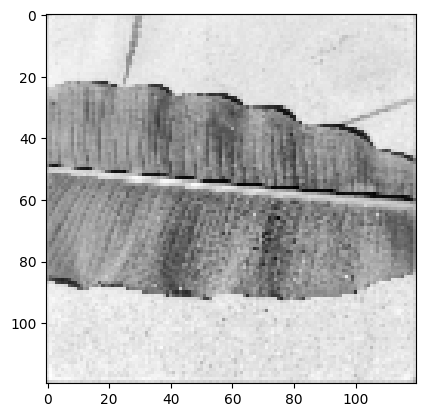

In [48]:
prediction3 = unet2.predict(testImg)
plt.imshow(prediction3[0], cmap='gray');

In [55]:
tf.image.ssim(prediction2, prediction3, max_val=1.0)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9817731], dtype=float32)>

In [57]:
unet2.save(r"models\Unet2.keras")

In [62]:
x1 = tf.keras.layers.Conv2D(32, 3, padding='same')(input_img)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.ReLU()(x1)

x2 = tf.keras.layers.MaxPooling2D()(x1)
x2 = residual_block(x2, 64)

x3 = tf.keras.layers.MaxPooling2D()(x2)
x3 = residual_block(x3, 128)

x4 = tf.keras.layers.MaxPooling2D()(x3)
x4 = residual_block(x4, 256)

# ----- Bottleneck -----
bn = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x4)

# ----- Decoder -----
u3 = tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same', activation='relu')(bn)
u3 = tf.keras.layers.Concatenate()([u3, x3])
u3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(u3)
u3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(u3)

u2 = tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu')(u3)
u2 = tf.keras.layers.Concatenate()([u2, x2])
u2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(u2)
u2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(u2)

u1 = tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(u2)
u1 = tf.keras.layers.Concatenate()([u1, x1])
u1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(u1)
u1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(u1)

# ----- Output -----
outputs = tf.keras.layers.Conv2D(1, 1, activation='sigmoid', padding='same')(u1)

# ----- Final Model -----
resnetEncoder = tf.keras.Model(input_img, outputs, name="resnet_skip_autoencoder")
resnetEncoder.summary()

Model: "resnet_skip_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_326 (Conv2D) │ (None, 120, 120,  │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 120, 120,  │        128 │ conv2d_326[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 120, 120,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_100   │ (None, 60, 60,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_328 (Conv2D) │ (None, 60, 60,    │     18,496 │ max_pooling2d_10… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        256 │ conv2d_328[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_329 (Conv2D) │ (None, 60, 60,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        256 │ conv2d_329[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_327 (Conv2D) │ (None, 60, 60,    │      2,112 │ max_pooling2d_10… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 60, 60,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_327[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 60, 60,    │          0 │ add_9[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_101   │ (None, 30, 30,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_331 (Conv2D) │ (None, 30, 30,    │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        512 │ conv2d_331[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_332 (Conv2D) │ (None, 30, 30,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        512 │ conv2d_332[0][0]

 Total params: 5,874,817 (22.41 MB)

 Trainable params: 5,872,961 (22.40 MB)

 Non-trainable params: 1,856 (7.25 KB)

In [ ]:
resnetEncoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

resnetEncoder.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50)

In [19]:
# Encoder
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(e1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(e1)

e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(p1)
e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(e2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(e2)

e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(p2)
e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(e3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(e3)

e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(p3)
e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(e4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(e4)

# Latent Space
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(p4)
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l)
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l)
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l)

# Decoder with Residual Blocks
u4 = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2))(l)
u4 = tf.keras.layers.Concatenate()([u4, e4])
u4 = residual_block(u4, 256)

u3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(u4)
u3 = tf.keras.layers.Concatenate()([u3, e3])
u3 = residual_block(u3, 128)

u2 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(u3)
u2 = tf.keras.layers.Concatenate()([u2, e2])
u2 = residual_block(u2, 64)

u1 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(u2)
u1 = tf.keras.layers.Concatenate()([u1, e1])
u1 = residual_block(u1, 32)

# Output
output_img = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(u1)

# Autoencoder Model
perceptualEncoder = tf.keras.Model(inputs=input_img, outputs=output_img, name='Perceptualencoder')
perceptualEncoder.summary()

Model: "Perceptualencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 120, 120,  │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 120, 120,  │      9,248 │ conv2d_48[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 60, 60,    │          0 │ conv2d_49[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 60, 60,    │     18,496 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 60, 60,    │     36,928 │ conv2d_50[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 30, 30,    │          0 │ conv2d_51[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 30, 30,    │     73,856 │ max_pooling2d_13… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 30, 30,    │    147,584 │ conv2d_52[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 15, 15,    │          0 │ conv2d_53[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 15, 15,    │    295,168 │ max_pooling2d_14… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 15, 15,    │    590,080 │ conv2d_54[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 7, 7, 256) │          0 │ conv2d_55[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 7, 7, 512) │  1,180,160 │ max_pooling2d_15… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 7, 7, 512) │  2,359,808 │ conv2d_56[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 7, 7, 512) │  2,359,808 │ conv2d_57[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 7, 7, 512) │  2,359,808 │ conv2d_58[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_6  │ (None, 15, 15,    │  1,179,904 │ conv2d_59[0][0]   │
│ (Conv2DTranspose)   │ 256)              │            │                 

 Total params: 13,527,937 (51.60 MB)

 Trainable params: 13,526,017 (51.60 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [23]:
perceptualEncoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

perceptualEncoder.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - loss: 0.5709
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 309s 6s/step - loss: 0.2905
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 275s 5s/step - loss: 0.2461
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - loss: 0.2391
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.2276
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - loss: 0.2150
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.2023
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - loss: 0.2071
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.1934
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - loss: 0.1982
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - loss: 0.1952
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - loss: 0.1980
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - loss: 0.2071
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.1958
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - loss: 0.2017
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


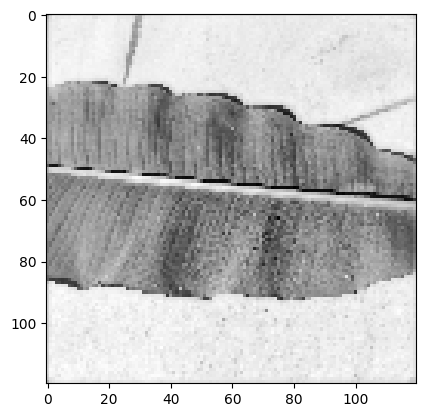

In [24]:
prediction4 = perceptualEncoder.predict(testImg)
plt.imshow(prediction4[0], cmap='gray');

In [26]:
perceptualEncoder.save(r'models/UResNetEncoder.keras')